In [1]:
#ESSENSIALS


#importing the needed libraries
import pickle
import math
import numpy as np

#importing matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import winter

%matplotlib inline
#gets pickle files from directories
pickleContents = open ( r"C:\Users\DGama\OneDrive\Documents\School\poly\SURP-2024\NS_SURP2024\week_2-3\eostable.pk", "rb" )
eos_db = pickle.load(pickleContents)
#print (pickle.keys())

In [2]:
#GETTING EOS

#My though is to have a 2D list that itself contain the p and rho list for each EOS

#maybe copy and paste EVERY KEY manually

#EOS_keys = ["DNS_CMF_wcrust/", "DS_CMF1_wcrust/", "DS_CMF2_wcrust/", "DS_CMF3_wcrust/", "DS_CMF4_wcrust/", 
#            "DS_CMF5_wcrust/", "DS_CMF6_wcrust/", "DS_CMF7_wcrust/", "DS_CMF8_wcrust/", "OPGR_DDHdeltaY4/",
#            "OPGR_GM1Y4/", "OPGR_GM1Y5/", "OPGR_GM1Y6/", "QMC-RMF1/", "QMC-RMF2/", "QMC-RMF3/", "QMC-RMF4/",
#            "R_DD2YDelta_1.1/", "R_DD2YDelta_1.2/", "R_DD2YDelta_1.3/"] 

EOS_keys = []
ps_local = []
rhos_local =[]
#fill out every EOS name
for i in eos_db.keys():
    EOS_keys.append(i)
    
print(EOS_keys)


['DNS_CMF_wcrust/', 'DS_CMF1_wcrust/', 'DS_CMF2_wcrust/', 'DS_CMF3_wcrust/', 'DS_CMF4_wcrust/', 'DS_CMF5_wcrust/', 'DS_CMF6_wcrust/', 'DS_CMF7_wcrust/', 'DS_CMF8_wcrust/', 'OPGR_DDHdeltaY4/', 'OPGR_GM1Y4/', 'OPGR_GM1Y5/', 'OPGR_GM1Y6/', 'QMC-RMF1/', 'QMC-RMF2/', 'QMC-RMF3/', 'QMC-RMF4/', 'R_DD2YDelta_1.1/', 'R_DD2YDelta_1.2/', 'R_DD2YDelta_1.3/']


In [4]:
#getting ps and rho from the EOS

def get_p_local(key):
    return eos_db[key]['ps']

In [5]:
#getting ps and rho from the EOS

def get_rho_local(key):
    return eos_db[key]['rhos']

In [7]:
p_local = get_p_local('DS_CMF1_wcrust/')
rho_local = get_rho_local('DS_CMF1_wcrust/')

In [32]:
##
#rhos to ps subroutine
def rho_to_ps(rho_target):
    #rho_local = get_rho_local(eos_key)
    for x in range(len(rho_local)-1):
        
        #p_local = x
    #first case: when the p_targer is less that the first value of the p_local
        if rho_target < rho_local[0]:
                rho_target = rho_local[0]
                x = 0
                break
    #second case: when the p_target is greater than the last value of the p_local    
        if rho_target >= rho_local[-1]:
                #have to do this as otherwise it would try to access a value that does not exist
                rho_target = rho_local[-1]
                x = len(rho_local)-2
                break
    #Deafult case, When the rho target is between the given parameters needed
        if rho_local[x] < rho_target and rho_local[x+1] > rho_target:
                #local = x
                break
    #Equation used:  
    #print("p_Local: ",p_local[x])
    p_target = p_local[x] + (((p_local[x+1] - p_local[x]) / (rho_local[x+1] - rho_local[x])) * (rho_target - rho_local[x]))
    
    return p_target
##

In [33]:
#ps_to_rhos routine
def ps_to_rho(p_target):
    #p_local = get_p_local(eos_key)
    #rho_local = x
    for x in range(len(rho_local)-1):
    #first case: when the p_targer is less that the first value of the p_local
        if p_target < p_local[0]:
                p_target = p_local[0]
                x = 0
                break
    #second case: when the p_target is greater than the last value of the p_local    
        if p_target >= p_local[-1]:
                #have to do this as otherwise it would try to access a value that does not exist
                p_target = p_local[-1]
                x = len(p_local)-2
                break
    #Deafult case, When the rho target is between the given parameters needed
        if p_local[x] < p_target and p_local[x+1] > p_target:
                #local = x
                break
   # print("rho_Local:",rho_local[x],)
    rho_target = rho_local[x] + (((rho_local[x+1] - rho_local[x]) / (p_local[x+1] - p_local[x])) * (p_target - p_local[x]))
    return rho_target
##

In [36]:
##
#rhos to ps subroutine
def rho_to_ps(rho_target):
    for x in range(len(rho_local)-1):
        
        #p_local = x
    #first case: when the p_targer is less that the first value of the p_local
        if rho_target < rho_local[0]:
                rho_target = rho_local[0]
                x = 0
                break
    #second case: when the p_target is greater than the last value of the p_local    
        if rho_target >= rho_local[-1]:
                #have to do this as otherwise it would try to access a value that does not exist
                rho_target = rho_local[-1]
                x = len(rho_local)-2
                break
    #Deafult case, When the rho target is between the given parameters needed
        if rho_local[x] < rho_target and rho_local[x+1] > rho_target:
                #local = x
                break
    #Equation used:  
    #print("p_Local: ",p_local[x])
    p_target = p_local[x] + (((p_local[x+1] - p_local[x]) / (rho_local[x+1] - rho_local[x])) * (rho_target - rho_local[x]))
    
    return p_target
##

In [12]:
#dp function
def dPdr(ps, rhos ,rs,  ms):
    #speed of ligth
    c = 2.99792458e10
    #Gravitational constant
    G = 6.6743e-8
    #Pi
    pi = math.pi

    
    mr = ms
    r = rs
    rho = rhos
    p = ps
    #dPdr equation
    dPdr = (-(G*mr*rho)/(r**2))*(1+(p)/(rho*c**2))*(1+((4*pi*r**3*p)/(mr*c**2)))*((1-((2*G*mr)/(c**2*r)))**-1)
    return dPdr

In [13]:
#dm function
def dmdr(rs,rhos):
    """Find the dmdr for future equations

    INPUT: rs as radius, and rhos for density    
    OUTPUT: the dmdr using the corresponding values
    NOTES: using 'math.pi' for calculations
    """
    r = rs
    rho = rhos
    #dmdr equation
    dmdr = 4*math.pi*r**2*rho
    return dmdr

In [14]:

def find_mass(ms):
    return ms[-1]
def find_radius(rs):
    return rs[-1]

In [15]:
#Runge-Kutta Routine

def runge_kutta(rho_c,dr,loops = 20000,debug=0):
    """
    INPUT:
        'rho_c' as 'rho'(density).'dr' as r,'loops' as the number of iterations preformed, set to 10000 by deafult.
    OUTPUT:
        rs,rhos,ps,ms arrays, containing the gatherd data from doing Runge Kutta method on Tolman
        Oppenheimer Volkoff equation. 
        
    """ 
    loop = loops
    #get the values from the end user to the function
    r = dr
    rho = rho_c
    #Constants
    #
    #speed of ligth
    c = 2.99792458e10
    #Gravitational constant
    G = 6.6743e-8
    #Pi
    pi = math.pi
    #
    p = rho_to_ps(rho)
    #value of mr, im assuming that this will remain the same from euler method
    mr = 4.0 /3.0 * pi * r**3 * rho
    #
    #array creation for storing the values for model analizys
    rs = [r]
    rhos = [rho]
    ps = [p]
    ms = [mr]
   ### 

   #To the poor person reading this code in a year or 2, i added the ability to declare the loop iterations because I felt lazy 
   #from having tochange that value every time i changed dr,I dont know why i did not do this to begin with but i digress
   # Dingo 24/6/2024


   #another note, I added a bool called debug, so it would not print out if the limit of the function has been broken every time i run this
   #subroutine, if you modify this then that oculd eb used for other debug purposes i suppose
   # Dingo 26/6/2026
    for i in range (loops):

        #rk i function
        dPdr_1 = dPdr(p,rho,r,mr)
        dmdr_1 = dmdr(r,rho)
        #rk i values
        mr_1 = mr + dmdr_1 * dr*(1/2)
        p_1 = p + dPdr_1 * dr*(1/2)

        rho_1 = ps_to_rho(p_1)
        r_1 = r + dr*(1/2)



        #rk ii function
        dPdr_2 = dPdr(p_1,rho_1,r_1,mr_1)
        dmdr_2 = dmdr(r_1,rho_1)
        #rk ii values

        mr_2 = mr_1 + dmdr_2 * dr*(1/2)
        p_2 = p_1 + dPdr_2 * dr*(1/2)

        rho_2 = ps_to_rho(p_2)
        r_2 = r_1 + dr*(1/2)



        #rk iii function
        dPdr_3 = dPdr(p_2,rho_2,r_2,mr_2)
        dmdr_3 = dmdr(r_2,rho_2)
        #rk iii values
        mr_3 = mr_2 + dmdr_3 * dr
        p_3 = p_2 + dPdr_3 * dr

        rho_3 = ps_to_rho(p_3)
        r_3 = r_2 + dr


        
        #rk iv function
        dPdr_4 = dPdr(p,rho,r,mr)
        dmdr_4 = dmdr(r,rho)
        #rk iv values
        mr_4 = mr_3 + dmdr_4 * dr*(1/2)
        p_4 = p_3 + dPdr_4 * dr*(1/2)

        rho_4 = ps_to_rho(p_4)
        r_4 = r_3 + dr

        #get new values

        m_new = mr + ((dmdr_1/6)+(dmdr_2/3)+(dmdr_3/3)+(dmdr_4/6)) * dr
        r_new = r + dr
        p_new = p + ((dPdr_1/6)+(dPdr_2/3)+(dPdr_3/3)+(dPdr_4/6)) * dr
        
        rho_new = ps_to_rho(p_new)
# append the new data
        rs.append(r_new)
        ps.append(p_new)
        ms.append(m_new)
        rhos.append(rho_new)
        
        # replace old by your new values
        r = r_new
        rho = rho_new
        p = p_new
        mr = m_new
        if rho < 1e-4 * rho_c:
            #following 2 lines should be commented after debugging is done
            if debug == 1:
                print("break condition met!")
                print(rho , " < ", 1**-4*rho_c)
            break
    
    return rs, rhos, ps, ms     



In [17]:
p_local = get_p_local('DS_CMF1_wcrust/')
rho_local = get_rho_local ('DS_CMF1_wcrust/')

In [30]:
#gen ns function
def gen_ns(rho_c,ds,loops,eos_key):
    """


    """
    p_local = get_p_local(eos_key)
    rho_local = get_rho_local (eos_key)
    rs, rhos, ps, ms = runge_kutta(rho_c,ds,loops)
    return rs,rhos,ps,ms

In [43]:
def print_ns_MR(radius,mass):

    #radius = np.array(radius) / 1e5
    #mass = np.array(mass) / 2e33
    fig, ax = plt.subplots(ncols=1, nrows=1)
    x = radius
    ax.set_xlabel('Radius rhos')
    # Y-axis values 
    y = mass
    ax.set_ylabel('Solar mass ms')
    # Function to plot 
    ax.plot(x, y, "-o")
    # function to show the plot 
    # plt.show()
    return plt

In [53]:
def store_NS():
    """
    INPUT:  take data from a genetated Neutron Star model
    OUTPUT: Store the information into a .txt document, to prevent from having to compile the data multiple times
    """
    file = open("test.txt","w")
    file.write("this is a test")
    file.close()

    return ("NS stored")

<module 'matplotlib.pyplot' from 'c:\\Users\\DGama\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

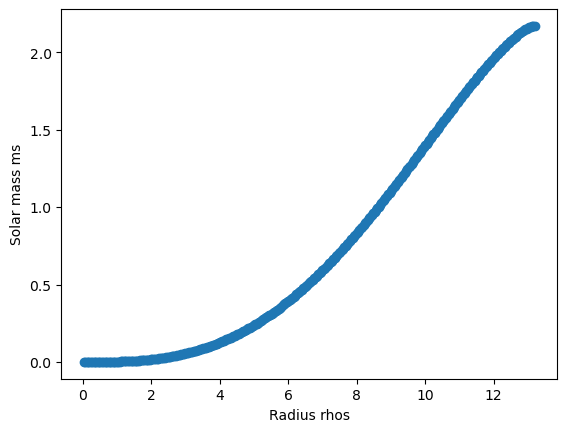

In [39]:
rs, rhos, ps, ms = gen_ns(1e15,4000,5000,'DS_CMF1_wcrust/')
find_mass(ms)
find_radius(rs)

print_ns_MR(rs,ms)


In [48]:
def gen_ns_MR(key_nb):

        rhos_cs=[2e14,2.25e14,2.5e14,2.75e14,3e14,3.25e14,3.5e14,3.75e14,4e14,4.25e14,4.5e14,4.75e14,5e14,5.5e14,
                6e14,6.5e14,7e14,7.5e14,8e14,8.5e14,9e14,9.5e14,10e14,10.5e14,
                11e14,12e14,13e14,14e14,15e14,16e14,17e14,18e14,19e14,20e14,
                21e14,22e14,23e14,24e14,25e14,26e14,27e14,28e14,29e14,30e14]
        mass_cs = []   
        radius_cs = []
        for z in rhos_cs:
                rs,rhos,ps,ms= gen_ns(z,2000,10000,EOS_keys[key_nb])
                mass_cs.append(find_mass(ms)/2e33)
                radius_cs.append(find_radius(rs)/1e5)
        return radius_cs, mass_cs

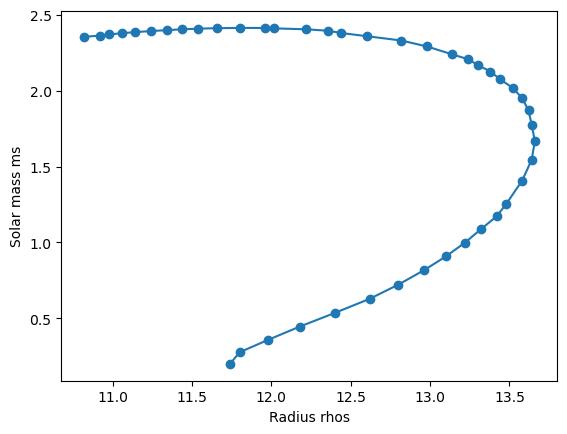

In [49]:
radius_cs, mass_cs = gen_ns_MR(1)
print_ns_MR(radius_cs,mass_cs )
plt.show()

In [54]:
store_NS()

'NS stored'